Project goal is to analyze student test performance from a school and compare it to other schools in the dataset. Focus analysis on a specific feature/measure/score.

I wanted to analyze high school students test scores and college readiness. To select a high school, I created a new dataframe with only 'high school' school types and selected a random school using the following code:

    random_school = df_hs['school name'].sample(n=1).iloc[0]
    print(random_school)

Chosen school: **High School for Civil Rights**

For the purpose of accurately comparing school scores, I decided to drop null values from the dataset in the 'mean score' column. Based on my exploration of the dataset, if there is no mean for a given row, it means tests scores were not captured.

If I had more context to be able to group the schools, I would have considered imputing data. The context that would have made me feel comfortable with data imputation would be some combination of school type (public, private), needs type (language, special education, trade specific), and class size.

To get a better undestading of expected data ranged, I first found descriptive data for all rows of the dataset (excluding dropped 'mean score' rows described above).

    mean: 71.58
    median: 39.0
    mode: 6
    standard deviation: 107.83
    variance: 11628.25
    min: 6
    max: 1729

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

In [56]:
# strip and lowercase all column headers to make them easier to work with
df.columns = df.rename(columns=lambda x: x.strip()).columns.str.lower()

# add 'borough' & 'size cat' [categorize sizes of school] columns for later use
df['borough'] = ''
df['size cat'] = ''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   school dbn                   212331 non-null  object
 1   school name                  212331 non-null  object
 2   school level                 212331 non-null  object
 3   regents exam                 212321 non-null  object
 4   year                         212331 non-null  int64 
 5   total tested                 212331 non-null  int64 
 6   mean score                   212331 non-null  object
 7   number scoring below 65      212331 non-null  object
 8   percent scoring below 65     212331 non-null  object
 9   number scoring 65 or above   212331 non-null  object
 10  percent scoring 65 or above  212331 non-null  object
 11  number scoring 80 or above   212331 non-null  object
 12  percent scoring 80 or above  212331 non-null  object
 13  number scoring

In [57]:
# convert required columns to ints/floats
for col in df.columns[6:15]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   school dbn                   212331 non-null  object 
 1   school name                  212331 non-null  object 
 2   school level                 212331 non-null  object 
 3   regents exam                 212321 non-null  object 
 4   year                         212331 non-null  int64  
 5   total tested                 212331 non-null  int64  
 6   mean score                   137109 non-null  float64
 7   number scoring below 65      137109 non-null  float64
 8   percent scoring below 65     137109 non-null  float64
 9   number scoring 65 or above   137109 non-null  float64
 10  percent scoring 65 or above  137109 non-null  float64
 11  number scoring 80 or above   137109 non-null  float64
 12  percent scoring 80 or above  137109 non-null  float64
 13 

In [58]:
df.head()

,school dbn,school name,school level,regents exam,year,total tested,mean score,number scoring below 65,percent scoring below 65,number scoring 65 or above,percent scoring 65 or above,number scoring 80 or above,percent scoring 80 or above,number scoring cr,percent scoring cr,borough,size cat
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8,NaN,NaN,,
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2,NaN,NaN,,
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,


In [59]:
# remove null rows
df = df.dropna(subset=['mean score'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137109 entries, 1 to 212325
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   school dbn                   137109 non-null  object 
 1   school name                  137109 non-null  object 
 2   school level                 137109 non-null  object 
 3   regents exam                 137101 non-null  object 
 4   year                         137109 non-null  int64  
 5   total tested                 137109 non-null  int64  
 6   mean score                   137109 non-null  float64
 7   number scoring below 65      137109 non-null  float64
 8   percent scoring below 65     137109 non-null  float64
 9   number scoring 65 or above   137109 non-null  float64
 10  percent scoring 65 or above  137109 non-null  float64
 11  number scoring 80 or above   137109 non-null  float64
 12  percent scoring 80 or above  137109 non-null  float64
 13  numb

In [60]:
# function to determine borough from school dbn code
def get_borough(dbn):
    if 'M' in dbn:
        return 'manhattan'
    elif 'X' in dbn:
        return 'bronx'
    elif 'K' in dbn:
        return 'brooklyn'
    elif 'Q' in dbn:
        return 'queens'
    elif 'R' in dbn:
        return 'staten Island'
    else:
        return 'unknown'

df['borough'] = df['school dbn'].apply(get_borough)
df.head()

,school dbn,school name,school level,regents exam,year,total tested,mean score,number scoring below 65,percent scoring below 65,number scoring 65 or above,percent scoring 65 or above,number scoring 80 or above,percent scoring 80 or above,number scoring cr,percent scoring cr,borough,size cat
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8,NaN,NaN,manhattan,
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2,NaN,NaN,manhattan,
5,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.4,3.0,33.3,6.0,66.7,0.0,0.0,NaN,NaN,manhattan,
6,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.6,2.0,13.3,13.0,86.7,5.0,33.3,NaN,NaN,manhattan,
7,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4,5.0,55.6,4.0,44.4,1.0,11.1,NaN,NaN,manhattan,


In [61]:
# set categories of sizes for the schools
def set_size_cat(num_tested):
  if num_tested < 100:
    return 'Less than 100'
  elif 100 <= num_tested <= 500:
    return '101 to 500'
  else:
    return '501 and up'

df['size cat'] = df['total tested'].apply(set_size_cat)

In [62]:
total_tested_avg = df['total tested'].mean()
total_tested_med = df['total tested'].median()
total_tested_mode = df['total tested'].mode()
mode_value = total_tested_mode[0]
total_tested_stddev = df['total tested'].std()
total_tested_variance = df['total tested'].var()
total_tested_min = df['total tested'].min()
total_tested_max = df['total tested'].max()

print(f"total tested mean: {round(total_tested_avg, 2)}")
print(f"total tested median: {round(total_tested_med, 2)}")
print(f"total tested mode: {round(mode_value, 2)}")
print(f"total tested standard deviation: {round(total_tested_stddev, 2)}")
print(f"total tested variance: {round(total_tested_variance, 2)}")
print(f"total tested min: {round(total_tested_min, 2)}")
print(f"total tested max: {round(total_tested_max, 2)}")

total tested mean: 71.58
total tested median: 39.0
total tested mode: 6
total tested standard deviation: 107.83
total tested variance: 11628.25
total tested min: 6
total tested max: 1729


In [63]:
tt_year_avg = df.groupby(['year'])['total tested'].mean()
tt_year_med = df.groupby(['year'])['total tested'].median()
tt_year_max = df.groupby(['year'])['total tested'].max()


print(f"total tested annually mean: {round(tt_year_avg, 2)}")
print(f"total tested annually median: {round(tt_year_med, 2)}")
print(f"total tested annually max: {round(tt_year_max, 2)}")

total tested annually mean: year
2015    72.01
2016    68.72
2017    74.29
Name: total tested, dtype: float64
total tested annually median: year
2015    40.0
2016    36.0
2017    42.0
Name: total tested, dtype: float64
total tested annually max: year
2015    1515
2016    1648
2017    1729
Name: total tested, dtype: int64


In [64]:
# find baseline college readiness data
df_2015 = df[df['year'] == 2015]
college_ready_2015 = df_2015.groupby(['size cat'])['number scoring cr'].sum()
college_ready_2015 = college_ready_2015.astype(int)
tt_size_cat_2015 = df_2015.groupby(['size cat'])['total tested'].sum()

# reindex series
desired_order = ['Less than 100', '101 to 500', '501 and up']
college_ready_2015 = college_ready_2015.reindex(desired_order)
tt_size_cat_2015 = tt_size_cat_2015.reindex(desired_order)

print('College ready in 2015:')
for size_cat, value in college_ready_2015.items():
    print(f'\t{size_cat}: {value:,}')
print('\nTotal students tested in 2015:')
for size_cat, value in tt_size_cat_2015.items():
  print(f'\t{size_cat}: {value:,}')

print('\nPercent of students ready for college in 2015:')
for size_cat, college_ready in college_ready_2015.items():
    total_tested = tt_size_cat_2015[size_cat]
    percentage = round((college_ready / total_tested) * 100, 2)
    print(f'\t{size_cat}: {percentage:.2f}%')

College ready in 2015:
	Less than 100: 226,463
	101 to 500: 258,456
	501 and up: 114,121

Total students tested in 2015:
	Less than 100: 1,456,036
	101 to 500: 1,498,116
	501 and up: 497,317

Percent of students ready for college in 2015:
	Less than 100: 15.55%
	101 to 500: 17.25%
	501 and up: 22.95%


In [65]:
# finding the mean of the percent scoring shows different data than I would expect
df.groupby(['year'])['percent scoring cr'].mean()

,percent scoring cr
year,
2015,28.209761
2016,35.828555
2017,47.665410


In [66]:
# create dataframe only examining designated high schools
df_hs = df[df['school level'] == 'High school']

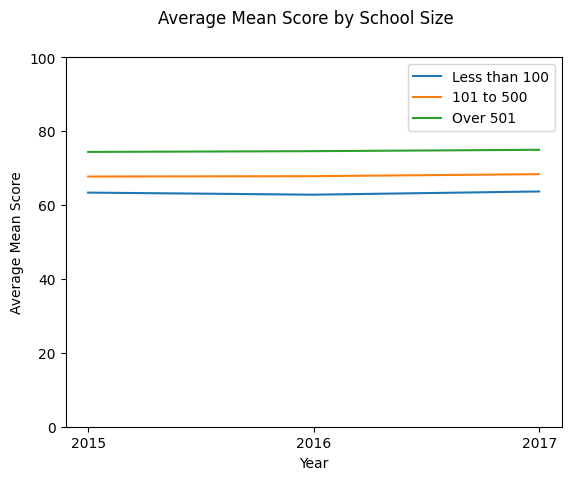

In [74]:
# compare scores each year by schools in different size catefories
sm_hs = df_hs[df_hs['size cat'] == 'Less than 100']
sm_avg = sm_hs.groupby(['year'])['mean score'].mean()

m_hs = df_hs[df_hs['size cat'] == '101 to 500']
m_avg = m_hs.groupby(['year'])['mean score'].mean()

l_hs = df_hs[df_hs['size cat'] == '501 and up']
l_avg = l_hs.groupby(['year'])['mean score'].mean()


plt.plot(sm_avg.index, sm_avg.values, label='Less than 100')
plt.plot(m_avg.index, m_avg.values, label='101 to 500')
plt.plot(l_avg.index, l_avg.values, label='Over 501')

plt.xlabel('Year')
plt.ylabel('Average Mean Score')
plt.suptitle('Average Mean Score by School Size')
# plt.grid(True)
plt.xticks([2015, 2016, 2017])
plt.ylim(0, 100)

plt.legend()

plt.show()

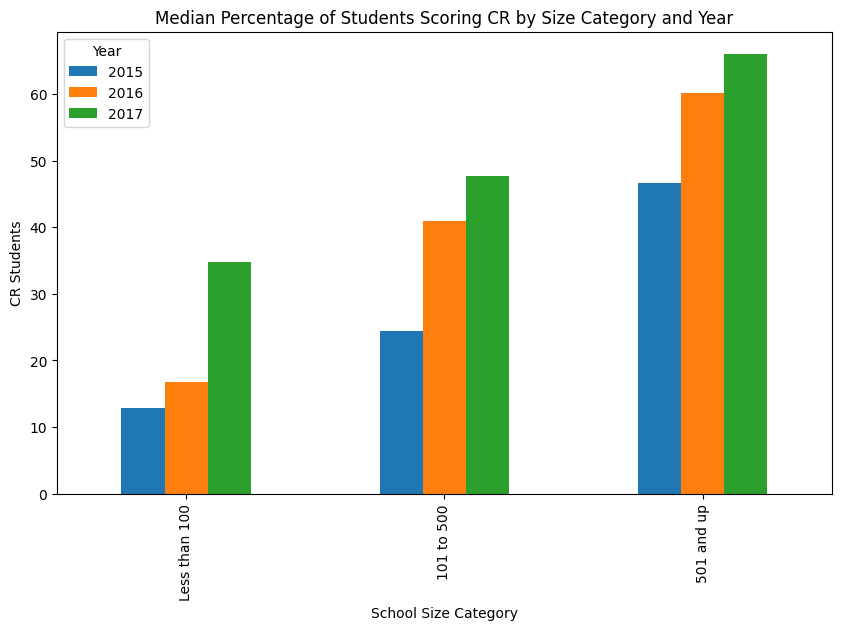

In [75]:
# compare median percentages of students scoring 'college ready' on regents exam by school size category over the years
df_hs_grouped = df_hs.groupby(['year', 'size cat'])['percent scoring cr'].median().unstack(level=0)

desired_order = ['Less than 100', '101 to 500', '501 and up']
df_hs_grouped = df_hs_grouped.reindex(desired_order)

df_hs_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Median Percentage of Students Scoring CR by Size Category and Year')
plt.xlabel('School Size Category')
plt.ylabel('CR Students')
plt.legend(title='Year')
plt.show()

In [69]:
# create df for high school for civil rights - drop unnecessary columns
df_hs4cr = df_hs[df_hs['school name'] == 'High School for Civil Rights']
df_hs4cr = df_hs4cr.drop(columns=['school dbn', 'school name', 'school level', 'borough', 'size cat'])
df_hs4cr.head(10)

,regents exam,year,total tested,mean score,number scoring below 65,percent scoring below 65,number scoring 65 or above,percent scoring 65 or above,number scoring 80 or above,percent scoring 80 or above,number scoring cr,percent scoring cr
11661,Algebra2/Trigonometry,2015,10,55.0,8.0,80.0,2.0,20.0,0.0,0.0,0.0,0.0
11662,Algebra2/Trigonometry,2016,11,59.1,7.0,63.6,4.0,36.4,2.0,18.2,2.0,18.2
11663,Common Core Algebra,2015,119,53.7,99.0,83.2,20.0,16.8,0.0,0.0,6.0,5.0
11664,Common Core Algebra,2016,123,59.3,76.0,61.8,47.0,38.2,5.0,4.1,29.0,23.6
11665,Common Core Algebra,2017,114,61.6,57.0,50.0,57.0,50.0,2.0,1.8,34.0,29.8
11668,Common Core English,2015,122,53.3,81.0,66.4,41.0,33.6,8.0,6.6,15.0,12.3
11669,Common Core English,2016,165,55.3,92.0,55.8,73.0,44.2,17.0,10.3,32.0,19.4
11670,Common Core English,2017,146,58.4,64.0,43.8,82.0,56.2,20.0,13.7,31.0,21.2
11671,Common Core Geometry,2015,17,45.7,17.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0
11672,Common Core Geometry,2016,24,41.8,24.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
hs4cr_med_mean = df_hs4cr.groupby(['regents exam'])['mean score'].median()
hs4cr_avg_mean = df_hs4cr.groupby(['regents exam'])['mean score'].mean()

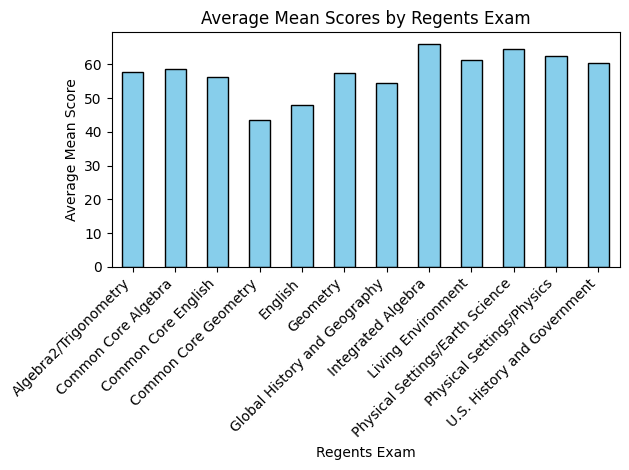

In [71]:
# show average mean scores for all years as hs4cr
hs4cr_avg_mean.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Average Mean Scores by Regents Exam')
plt.xlabel('Regents Exam')
plt.ylabel('Average Mean Score')

# Rotate the x-axis labels if needed for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjusts layout to fit the labels
plt.show()

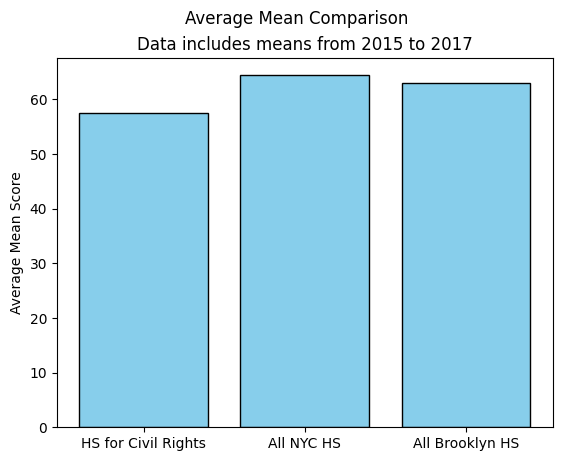

In [72]:
# compare average scores for hs4cr, brooklyn hs's, and all nyc hs's

# set up brooklyn df
df_hs_brooklyn = df_hs[df_hs['borough'] == 'brooklyn']

df_hs4cr_avg = df_hs4cr['mean score'].mean()
df_hs_brooklyn_avg = df_hs_brooklyn['mean score'].mean()
df_hs_avg = df_hs['mean score'].mean()

# create list for bar chart
avg_scores = [df_hs4cr_avg, df_hs_avg, df_hs_brooklyn_avg]

# create labels
labels = ['HS for Civil Rights', 'All NYC HS', 'All Brooklyn HS']

plt.bar(labels, avg_scores, color='skyblue', edgecolor='black')
plt.suptitle('Average Mean Comparison')
plt.title('Data includes means from 2015 to 2017')
plt.ylabel('Average Mean Score')
plt.show()

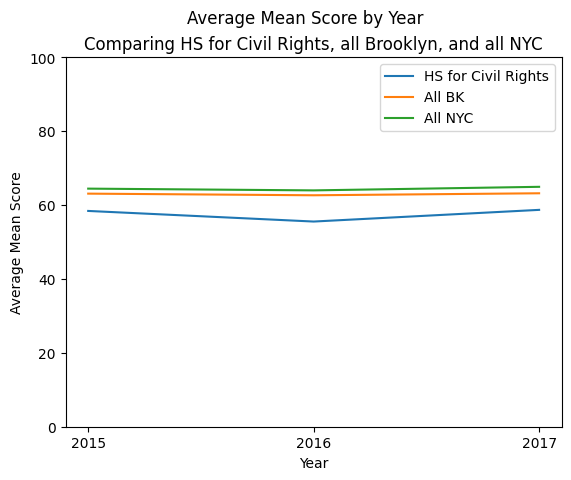

In [73]:
# compare average scores for hs4cr, brooklyn hs's, and nyc hs's
bk_avg_year = df_hs_brooklyn.groupby(['year'])['mean score'].mean()
hs4cr_avg_year = df_hs4cr.groupby(['year'])['mean score'].mean()
hs_avg_year = df_hs.groupby(['year'])['mean score'].mean()

plt.plot(hs4cr_avg_year.index, hs4cr_avg_year.values, label='HS for Civil Rights')
plt.plot(bk_avg_year.index, bk_avg_year.values, label='All BK')
plt.plot(hs_avg_year.index, hs_avg_year.values, label='All NYC')

plt.xlabel('Year')
plt.ylabel('Average Mean Score')
plt.suptitle('Average Mean Score by Year')
plt.title('Comparing HS for Civil Rights, all Brooklyn, and all NYC')
# plt.grid(True)
plt.xticks([2015, 2016, 2017])
plt.ylim(0, 100)

plt.legend()

plt.show()

In conclusion, High School for Civil Rights generally underpreformed other comprable high schools, both locally in Brooklyn and in NYC. The school was consistent with general trends of improving test scores between 2015 and 2017, and in some cases by a wider margin.